## Background 

Cardio Good Fitness is a retail store that sells a variety of fitness products including 3 grades of treadmills. 


## Data
__The dataset is for the company’s treadmill product(s). It contains the following variables:__

- Product - the model no. of the treadmill  
- Age - in no of years, of the customer  
- Gender - of the customer  
- Education - in no. of years, of the customer  
- Marital Status - of the customer  
- Usage - Avg. # times the customer wants to use the treadmill every week  
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)  
- Income - of the customer  
- Miles- expected to run  

## Obective
Explore the dataset to identify differences between customers of each product. You can also explore relationships between the different attributes of customers. You can approach it from any other line of questioning that you feel could be relevant for
the business.

You are expected to do the following :

- Come up with a customer profile (characteristics of a customer) of the different products
- Perform uni-variate and multi-variate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers

### 1.1 Load the libraries

In [573]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings('ignore') # To supress warnings

### 1.2. Import the dataset

In [574]:
data  = pd.read_csv('CardioGoodFitness.csv') # Import the dataset named CardioGoodFitness.csv
data.head()  # view the first 5 rows of the data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### 1.3 Check the Dimension of data

In [575]:
data.shape # Check the shape of the data

(180, 9)

### Observation
- There are 180 rows and 9 columns in this dataset

### 1.4 Check the Information about the data

In [576]:
pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values']) # Number of missing values in the data

,Number of missing values
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [577]:
# Change datatypes
data['Product'] = data['Product'].astype('category') # Convert Product from Object to Category datatype 
data['Gender'] = data['Gender'].astype('category') # Convert Gender from Object to Category datatype 
data['MaritalStatus'] = data['MaritalStatus'].astype('category') # Convert MaritalStatus from Object to Category datatype 

In [578]:
data.info() # To see the data type of each variable and the count of non-null values within each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


### Observations
- There are 6 numerical variables and 3 object variables

- The object variables would need to be converted to category datatype as they contain finite number of possible values 

- There are no missing values within the dataset.

### 1.5 Descriptive Analysis of Quantitative Variables

In [579]:
data.describe() # Five(5) number summary of the quantitative variables

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [580]:
data.describe(exclude=[np.number]) # Descriptive analysis of the qualitative variables

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


### Observations 
The five number summary helps describe the centre, spread and shape of the data

- The variables Age, Usage, Fitness, Income and Miles have their means greater than their median which means, they may have a right skewed distribution

- The variable Education has its mean less than its median which means, it may have a left skewed distribution

- Age, income and Expected Miles Run of the customers are spread over a large range. 

- There exists outliers within the dataset. Decisions on how to treat them will need to be made.

- These assumptions will be validated using visualizations later on in this project. 

- We have 3 unique products within the dataset with the most frequent product sold being TM195

- About 58% of customers are Male.

- About 59.4% of customers have partners

### 1.6 Exploratory Data Analysis (Univariate Analysis)

In [581]:
# Function to create Histogram and Boxplot Visualizations
def hist_box(variable, bins, xlabel):
    plt.figure(figsize=(8,5)) # set the figure size
    sns.distplot(variable, bins=bins) # Plot the histogram

    plt.axvline(variable.mean(),color='green',label='Mean') # Draw lines on the plot for mean and median of the variable
    plt.axvline(variable.median(),color='blue',label='Median')

    plt.xlabel(xlabel) # label the x-axis
    plt.ylabel('Frequency') # label the y-axis
    plt.legend() # Plot the legend
    plt.title('Measure of Central Tendency and Dispersion') # Display plot title
    plt.show() # Display Plot
    
    plt.figure(figsize=(8,5)) # set the figure size
    sns.boxplot(variable) # Plot BoxPlot

### 1.6.1 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Age)

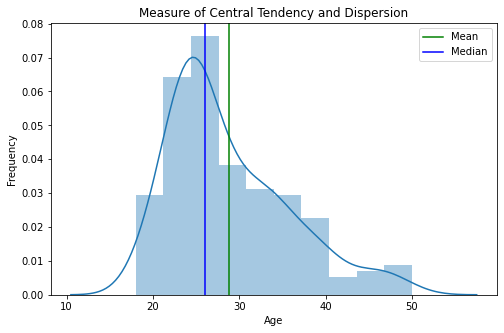

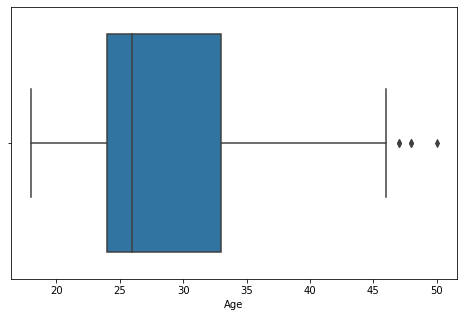

In [582]:
# Plot histogram and boxplot for Age Variable
hist_box(data['Age'], 10, 'Age')

### Observation
1. Age has a right skewed distribution with a few outliers towards the higher end. The median value will be used for analysis to work around this challenge as it is more robust to outliers


2. A large percentage of the customer base fall between the ages of 20 and 30 and then there is a steady decline as the age gets to mid 30s. This is a concern for the company and questions such as, are customers less likely to use treadmills as they get older?, would need to be investigated.

### 1.6.2 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Education)

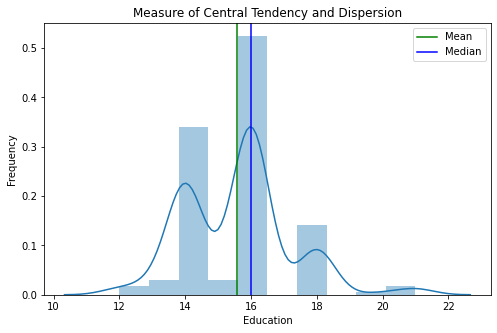

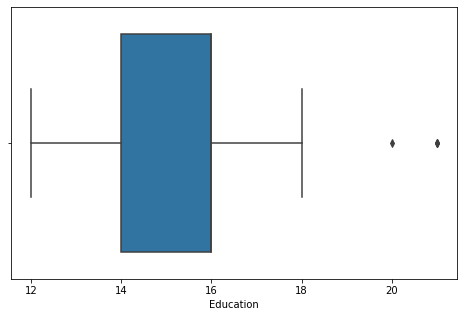

In [583]:
# Plot histogram and boxplot for Education Variable
hist_box(data['Education'], 10,'Education')

### Observation
1. The Education variable has a multimodal distribution (3 peaks) with the vast majority of datapoints falling between 14, 16 and 18 number of education years. This indicates that the variable contains discrete data
2. There is an overlap between the median and 75th percentile. What this means is that about 50% of customers have completed about 16 years of education
3. The Education variable is interesting as it has outliers on the right side but the mean is also less than the median. The median value will be used for analysis to work around this challenge as it is more robust to outliers

### 1.6.3 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Usage)

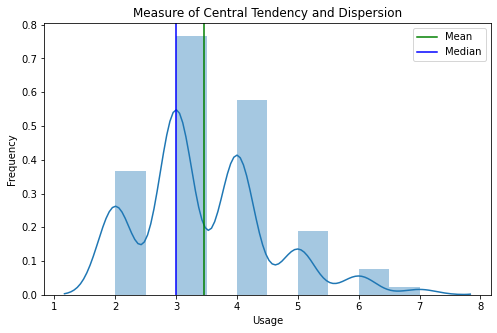

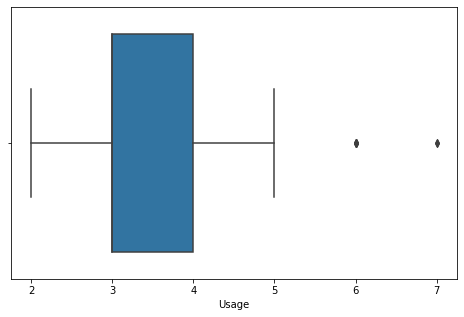

In [584]:
# Plot histogram and boxplot for Usage Variable
hist_box(data['Usage'], 10,'Usage')

### Observation
1. Most observations are centred around the mean however the existence of a couple of outliers gives this a right skewed distribution. The median value will be used for analysis to work around this challenge as it is more robust to outliers
2. This variable has a multimodal distribution which indicates the existence of discrete numerical data and also different weekly usage clusters amongst the customers
2. On average 25% of customers wants to make use of the treadmills 3 times a week as there is an overlap between 25th percentile and the median

### 1.6.4 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Fitness)

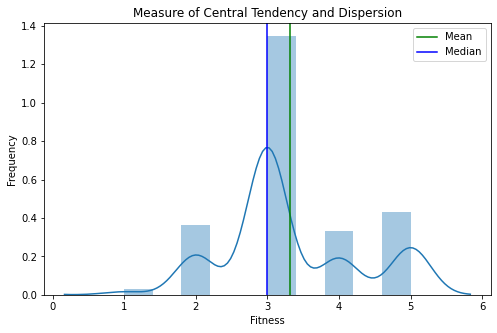

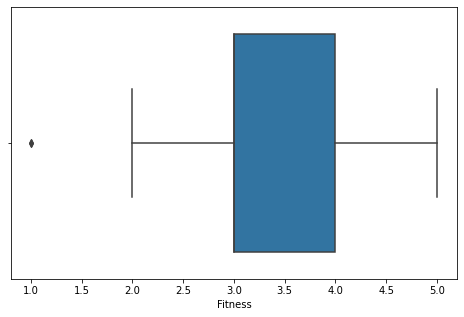

In [585]:
# Plot histogram and boxplot for Fitness Variable
hist_box(data['Fitness'], 10,'Fitness')

### Observations
1. This variable has a multi-modal distribution as it contains ordinal data (Likert scale).


2. A large number of customers rated their fitness levels to be in the mid-range. This is an intersting insight as it means there is room for growth and as such, marketing strategies can be designed for customers who are interested in scaling up their fitness levels. Other factors such as income levels and usage would need to be looked at to conclude on which of these customers could be targeted.

### 1.6.5 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Income)

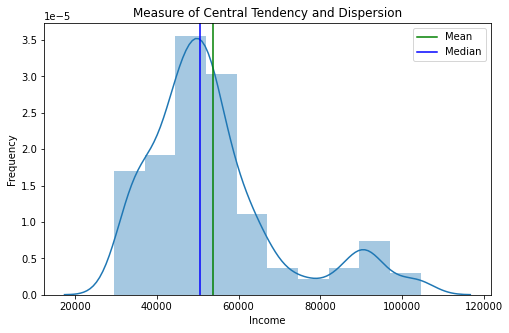

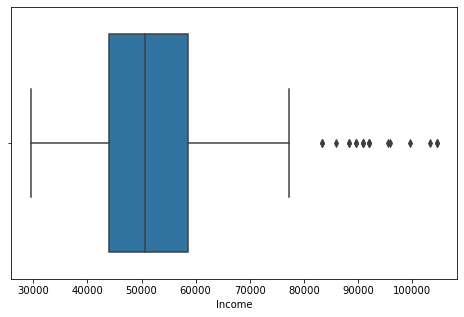

In [586]:
# Plot histogram and boxplot for Income Variable
hist_box(data['Income'], 10,'Income')

### Observation
1. Most observations are centred around the mean however the existence of outliers gives this a right skewed distribution. The median value will be used for analysis to work around this challenge as it is more robust to outliers
2. It will be interesting to investigate if a higher income will have a positive correlation with Usage, that is, would a higher income mean more time spent on the treadmill

### 1.6.6 Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Miles)

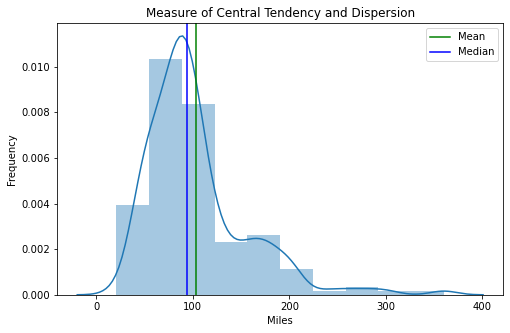

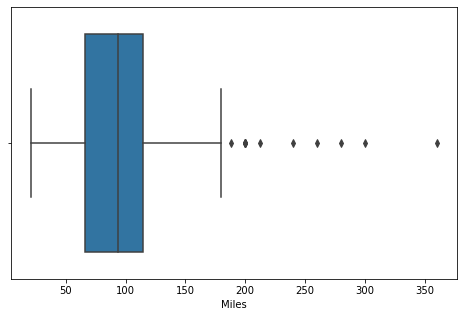

In [587]:
# Plot histogram and boxplot for Miles Variable
hist_box(data['Miles'], 10,'Miles')

### Observation
1. Most observations are centred around the mean however the existence of outliers gives this a right skewed distribution. The median value will be used for analysis to work around this challenge as it is more robust to outliers
2. The majority of customers run between 66 and 114 miles
3. We however have an observation that goes as high as 350 miles. 
4. This has a similar shape to the Usage variable which suggests that they are correlated

### 1.7 Feature Engineering

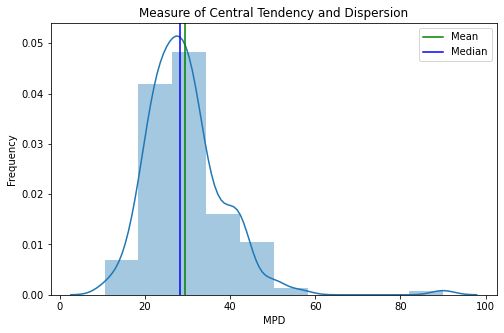

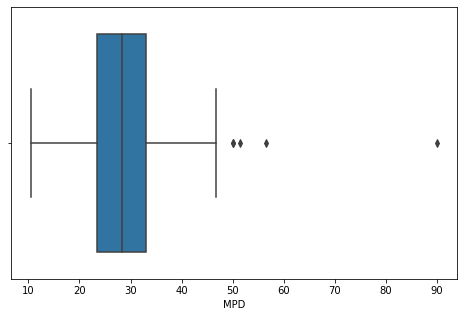

In [588]:
# Create a new variable called MPD to measure average mile run per day. 

data['MPD'] = data['Miles'] / data['Usage'] # Number of miles run per day

# Plot histogram and boxplot for Miles Variable
hist_box(data['MPD'], 10,'MPD')

### Observation

1. This variable has a right skewed distribution with the existence of a few outliers. The median value will be used for analysis to work around this challenge as it is more robust to outliers
2. On average customers run about 28 miles daily.

### 1.8 Exploratory Data Analysis (Multivariate Analysis)

### 1.8.1 Correlation of numerical variables 

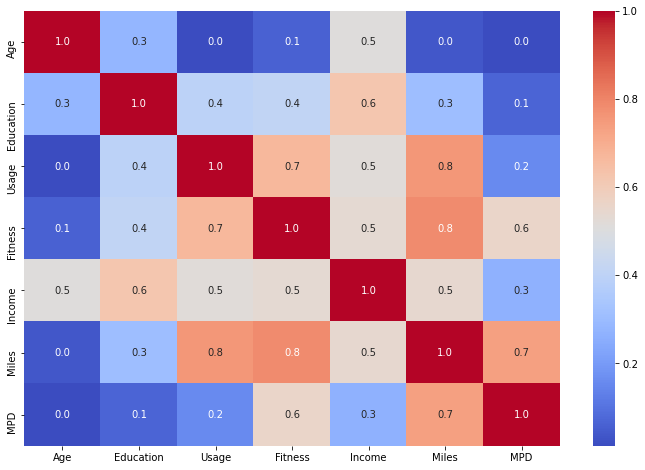

In [589]:
# Check for correlation among numerical variables
num = ['Age','Education','Usage','Fitness', 'Income', 'Miles', 'MPD'] # Select all numerical variables 

# Plot correlarion 
corr = data[num].corr() 

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt=".1f", xticklabels=corr.columns, yticklabels=corr.columns)

### Observations
1. Education has a pretty high correlation with income which suggests that the higher the customers education level, the higher the income will be. It however doesnt have a high correlation with usage which suggests that lack of knowledge isnt necessarily a factor to consider in looking at why some customers are less physically active


2. Usage is highly correlated with Fitness and Miles. This is logical as the more time a customer spends on the treadmill, the more miles he/she would run and hence, are more likely to give themselves a high fitness score.  


3. Another thing that is pretty interesting is that the amount of money you make doesnt necessarily mean a customer will workout more or less. What this means is that the financial factor is not necessarily a determinant in how often or well you workout.   


4. Finally, age is not highly correlated with any other variable. What this means is that assumptions like the higher the customers age, the more number of years they would have spent getting educated or the higher a customers age the higher their income will be is not supported by the data.  

### 1.8.2 Categorical Variables EDA

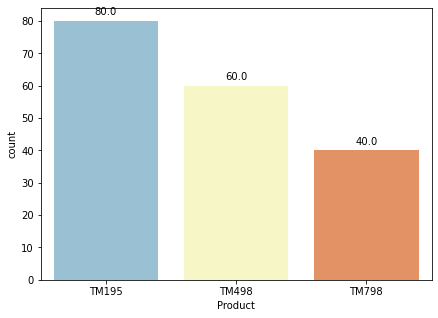

In [590]:
# What is the best selling product?
plt.figure(figsize=(7,5)) # Adjust Plot Size
s = sns.countplot(x='Product',data=data, palette='RdYlBu_r') # Plot Bar Plot
for i in s.patches:
    s.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') # Display Data Values
plt.show() #Display Plot

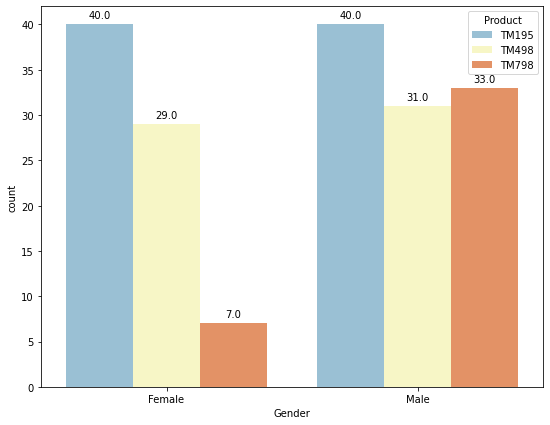

In [591]:
# What product do both genders use the most?
plt.figure(figsize=(9,7)) # Adjust Plot Size
s = sns.countplot(x='Gender',data=data, hue='Product', palette='RdYlBu_r') # Plot Bar Plot
for i in s.patches:
    s.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')  # Display Data Values
plt.show()

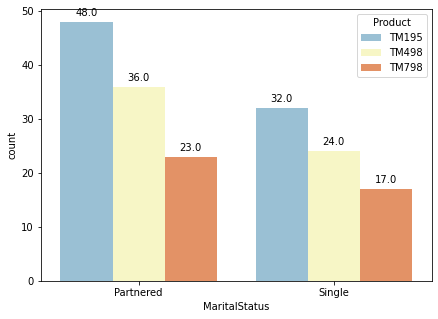

In [592]:
# What product do single and partnered customers prefer?
plt.figure(figsize=(7,5)) # Adjust Plot Size
s= sns.countplot(x='MaritalStatus',data=data, hue='Product', palette='RdYlBu_r') # Plot Bar Plot
for i in s.patches:
    s.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')  # Display Data Values
plt.show()

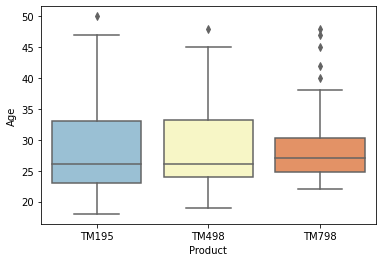

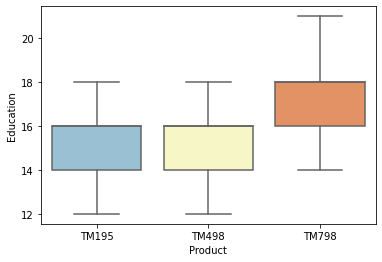

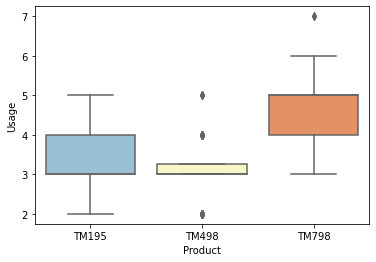

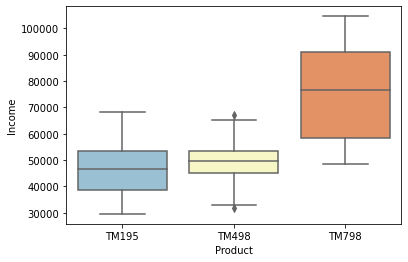

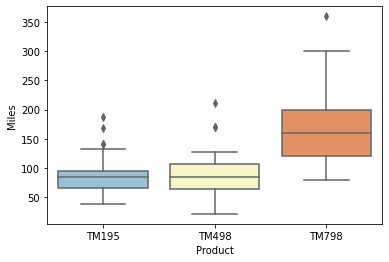

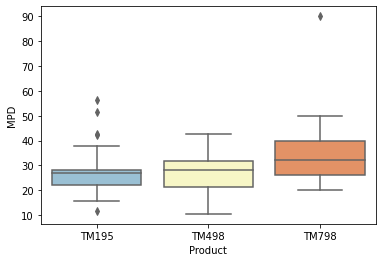

In [593]:
# Function to plot boxplot to compare Product to 'Age', 'Education', 'Usage','Income','Miles' and 'MPD'
my_list = ['Age', 'Education', 'Usage','Income', 'Miles','MPD']

def prod():
    for i in my_list:
        sns.boxplot(x='Product',y=i,data=data, palette='RdYlBu_r') # Plot Boxplot
        plt.show() # Display Boxplot
        
prod()

In [594]:
#Scatterplot Function for multivariate analysis
def scatter(variable1,variable2):
    plt.figure(figsize=(7,5)) # Adjust size of plot
    sns.scatterplot(x=variable1, y=variable2, data=data, hue='Product') # Plot Scatterplot
    plt.show() # Display plot

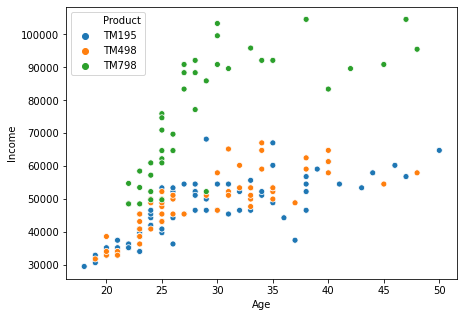

In [595]:
# How does Age and Income affect the decision on which model is purchased?
scatter('Age','Income')

### Observation
As earlier assumed, age has no significant impact on how much money you make and what product you choose 

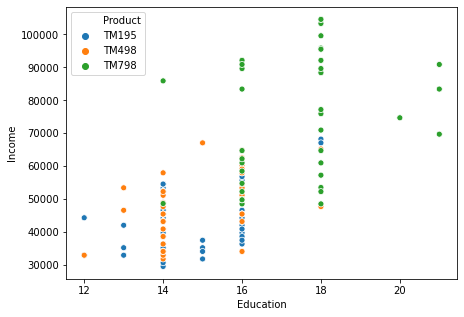

In [596]:
# How does Income and Education affect the decision on which model is purchased?
scatter('Education','Income')

### Observation
- From the plot, we can confirm that as education levels go up, the higher your income gets 
- We can also see that high income customers are more likely to purchase the TM798 product

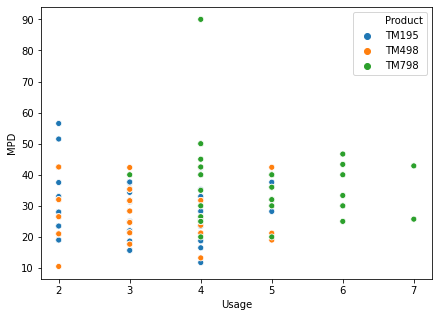

In [597]:
# How does Usage and Miles affect the decision on which model is purchased?
scatter('Usage','MPD')

### Observations

- This is an interesting insight as it means that number of times a treadmill is used every week depends alot on the type of treadmill it is. We can see that the higher the grade of the treadmill, the more number of days a week it can be used to avoid faults in the long term. 

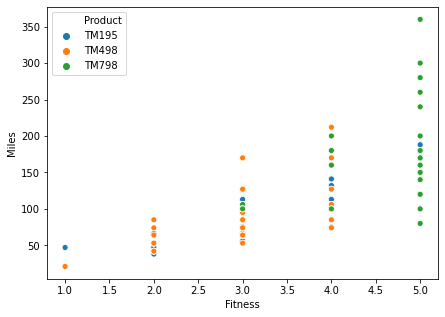

In [598]:
# How does Fitness and Miles affect the decision on which model is Purchased?
scatter('Fitness','Miles')

### Observation
- We can see that the more miles run has a direct correlation with how fit a customer rates themselves

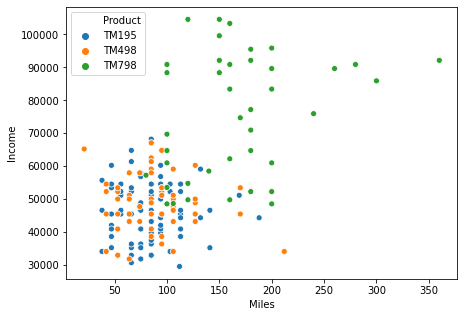

In [599]:
# How does Miles and Income affect the decision on which model is purchased?
scatter('Miles','Income')

### Observations
- There is some evidence that suggests that the more miles a customer runs, the more likely they have a high income

In [650]:
# Relationship between Product and all numerical variables
product_df = pd.DataFrame(data.groupby(by =['Product'])['Age','Income','Education','Usage','Miles','MPD','Fitness'].median().round()) # Group data by product and returning the median value of the numerical variables
product_df

,Age,Income,Education,Usage,Miles,MPD,Fitness
Product,,,,,,,
TM195,26.0,46617.0,16.0,3.0,85.0,27.0,3.0
TM498,26.0,49460.0,16.0,3.0,85.0,28.0,3.0
TM798,27.0,76568.0,18.0,5.0,160.0,32.0,5.0


In [652]:
# Relationship between Gender and all numerical variables
gender_df = pd.DataFrame(data.groupby(by =['Gender'])['Age','Income','Education','Usage','Miles','MPD','Fitness'].median().round()) # Group data by Gender and returning the median value of the numerical variables
gender_df

,Age,Income,Education,Usage,Miles,MPD,Fitness
Gender,,,,,,,
Female,26.0,47754.0,16.0,3.0,85.0,27.0,3.0
Male,26.0,52302.0,16.0,4.0,100.0,28.0,3.0


In [653]:
# Relationship between MaritalStatus and all numerical variables
ms_df = pd.DataFrame(data.groupby(by =['MaritalStatus'])['Age','Income','Education','Usage','Miles','MPD','Fitness'].median().round()) # Group data by MaritalStatus and returning the median value of the numerical variables
ms_df

,Age,Income,Education,Usage,Miles,MPD,Fitness
MaritalStatus,,,,,,,
Partnered,28,52302,16,3,85,28.0,3
Single,25,48658,16,3,95,28.0,3


In [654]:
# Relationship between Product, Gender and MaritalStatus and all numerical variables
df = pd.DataFrame(data.groupby(by =['Product','Gender','MaritalStatus'])['Age','Income','Education','Usage','Miles','MPD','Fitness'].median().round()) # Group data by Product, Gender and MaritalStatus and returning the median value of the numerical variables
df

Age   Income  Education  Usage  Miles   MPD  \
Product Gender MaritalStatus                                                 
TM195   Female Partnered      27.0  46617.0       14.0    3.0   66.0  25.0   
               Single         26.0  45480.0       16.0    3.0   75.0  25.0   
        Male   Partnered      30.0  51165.0       16.0    3.0   75.0  24.0   
               Single         25.0  43206.0       14.0    3.0   94.0  28.0   
TM498   Female Partnered      31.0  50028.0       16.0    3.0   85.0  28.0   
               Single         26.0  47186.0       15.0    3.0   80.0  27.0   
        Male   Partnered      31.0  52302.0       16.0    3.0   95.0  32.0   
               Single         25.0  47186.0       14.0    3.0   95.0  30.0   
TM798   Female Partnered      29.0  91508.0       18.0    6.0  200.0  43.0   
               Single         24.0  53536.0       18.0    5.0  100.0  25.0   
        Male   Partnered      27.0  83416.0       18.0    4.0  160.0  32.0   
               Single         26.0  59761.0       16.0    4.0  150.0  32.0   

                              Fitness  
Product Gender MaritalStatus           
TM195   Female Partnered          3.0  
               Single             3.0  
        Male   Partnered          3.0  
               Single             3.0  
TM498   Female Partnered          3.0  
               Single             3.0  
        Male   Partnered          3.0  
               Single             3.0  
TM798   Female Partnered          5.0  
               Single             4.0  
        Male   Partnered          5.0  
               Single             5.0

### Observations
- The average education level of TM195 and TM498 customers are the same which confirms our earlier assumption that education level is not an important factor in deciding what grade of treadmill to purchase
- We can also see that the quality of a customers treadmill is an important factor in deciding how many miles can be run daily
- There is a large gap in quality between TM498 and TM798 treadmills.
- On average male customers earn more than female customers despite having similar levels of education.
- Male customers are generally more physically active than female customers
- Partnered customers on average earn more than single customers.
- Single customers run more miles than partnered customers however, their Miles run per day is identical. 

### 1.9 Observations and Customer Profiles

#### TM195 Customer Profile
- The TM195 was the most sold product by the company with 80 units being sold

- The units sold was split evenly between Male (40 units) and Female (40 units)

- It was the most sold product between single and partnered customers with 32 units being sold to singles and 48 units being sold to partnered customers

- This product is typically purchased by customers of different ages with relatively lower income. They tend to have between 13-15 years of education and are not the most physically active and as such, they rate their physical fitness to be at an average level.


#### TM498 Customer Profile

- The TM498 customer was the second most sold product by the company.

- The product was purchased more by Males with 31 units bought and 29 units bought  by females.

- It was the second most popular product for both partnered and single customers with partnered customers buying 60% of the products

- There are alot of similarities between TM498 and TM195 customers with TM498 customers being slightly more affluent than TM195 customers. The Males on average run more miles than the females however collectively, they run more miles than TM195 customers. Like TM195 customers, they also view their fitness levels as average.


#### TM798 Customer Profile
- The TM798 product is the one with the least number of sales for the company with only 40 units sold.

- The product was sold to a lot more males than females with males accounting for 83% of the products total sales.

- The product is the least popular product between single and partnered customers with partnered customers buying 58% of the product 

- The product is mainly purchased by customers below the age of 35. These customers tend to be highly educated and also very affluent with the vast majority earning very high amounts of income. They tend to be heavy users of the product with most customers making use of it at least 4 days a week for an average of about 150 miles. As a consequence, they tend to rate themselves as extremely fit. 

### 1.10 Recommendations 

Cardio Good Fitness would have to come up with creative business strategies for their 3 treadmill products.

#### TM195
The TM195 carries the highest volume of sales for the company. However, considering the fact that the profile of customers who buy this product are low income earners, lower prices would need to be charged as these customers tend to be cost-conscious customers who are most likely to churn if a competitor provides better prices. The risk for the business while deploying this pricing strategy is that they could have a product that brings in low top and bottom line margins when you take into account shipping, storage and other costs that cuts into margins. This is not necessarily a bad thing for the company as the high volume of sales offsets this challenge. As such, Cardio Good Fitness would have to ensure the following: 

- Maintain a high sales volume of the TM195 product by:
    * __Focusing on the product benefits:__ This helps the customer understand why investing in the product is money well spent
    * __By creating a sense of urgency:__ As earlier stated, price-conscious customers compare and seek the best prices for the product you offer or similar products anongst competitors. As such, it is important to create a sense of urgeency which forces them to speed up the purchasing process and hence not giving them time to compare prices. Strategies like offering flash-sales can help trigger impulse buying behaviour.
    * __Offering added bonuses:__ The company can also ensure that sales are closed by offering added bonuses like free-shipping to sweeten the deal.  
    

- Taking advantage of economies of scale which would make price reductions for the TM195 product become a lot more feasible.


#### TM498
As previously mentioned, customers of TM498 product possess very similar characteristics to that of TM195 with the key differences being that TM498 customers have a higher income and on average, they run more miles per week. Considering the fact that their education, usage and fitness profiles are similar, we can conclude that based on available data, the higher the income levels the more likely customers will purchase TM498 over TM195 product. 

To ensure customers choose the TM498 product over TM195, Cardio Fitness must ensure that the value customers get out of the product is worth the higher price. The company must ensure that they constantly remind the these customers about the goals they wanted to achieve when they paid for the product that is, they must emphasize the products perceived value which could be the feeling of prestige they have when they own a higher grade of treadmill.

#### TM798
Customers who purchase these products can be said to fall into the high-end or luxury customer segment. Price is not a major pain point for these customers as such, Cardio Good Fitness will get away with setting a premium price for this product. These customers are more concerned about the special treatment and extra benefits they can get by buying the product. Key areas the company would need to focus on are:

- Customer Service
- Personalization
- Exclusivity and Uniqueness

The company can do this by making things like fitness apps, wearables and other fitness enhancing products available exclusively to these customers. The company could also set up loyalty programs which again would be available exclusively to these customers. The company could leverage on the customer data captured in understanding their purchase history, preferences, likes and dislikes to be able to deliver personalized experiences to them.

#### General Recommendation
As a differentiating factor, Cardio Good Fitness could provide free bodyweight only workout routines that will help in increasing the fitness levels of TM195 and TM498 customers
